# Amazon Sales report analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('Amazon Sale Report.csv')

In [3]:
data

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


## Exploratory Data Analysis

In [4]:
data.shape

(128976, 21)

In [5]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [6]:
data.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [7]:
sales_data = data.drop(columns=['New', 'PendingS', 'index'])
sales_data

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN


In [8]:
sales_data[sales_data.duplicated()].shape

(959, 18)

In [9]:
sales_data.drop_duplicates(inplace=True)

In [10]:
sales_data = sales_data[~(sales_data['Qty']==0)]
sales_data

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN
6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN


In [11]:
sales_data.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                124
Amount                  124
ship-city                27
ship-state               27
ship-postal-code         27
ship-country             27
B2B                       0
fulfilled-by          83341
dtype: int64

In [12]:
sales_data.dropna(subset= ['Amount', 'currency'], inplace=True)
sales_data.dropna(subset= ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace=True)
sales_data

C:\Users\DELL\AppData\Local\Temp\ipykernel_5788\3766361055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data.dropna(subset= ['Amount', 'currency'], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5788\3766361055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data.dropna(subset= ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace=True)


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN
6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN


In [13]:
sales_data.drop(columns= ['fulfilled-by'], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5788\2874037986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data.drop(columns= ['fulfilled-by'], inplace=True)


In [14]:
sales_data.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

## 1. Product Analysis

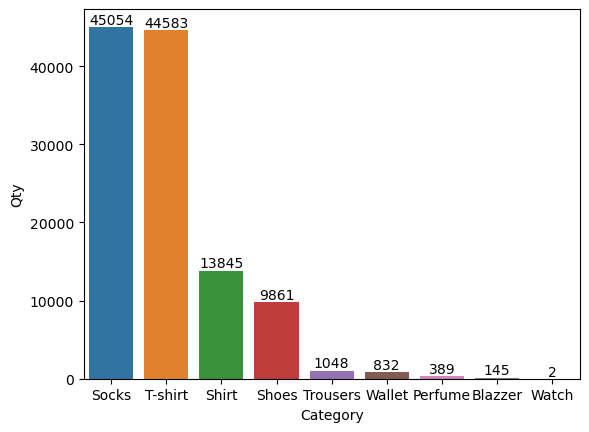

In [15]:
Qty = sales_data.groupby('Category')['Qty'].sum().tolist()
category = sales_data.Category.unique().tolist()
df = pd.DataFrame({"Category" : category, "Qty" : Qty})
df.sort_values(by = 'Qty', ascending=False, inplace=True)
ax = sns.barplot(x = df['Category'], y = df['Qty'])
for i in ax.containers:
    ax.bar_label(i)

## 2. Fulfillment analysis

In [16]:
sales_data.groupby('Category')['Fulfilment'].value_counts()

Category  Fulfilment
Blazzer   Amazon         8013
          Merchant       5787
Perfume   Amazon          795
          Merchant        251
Shirt     Amazon        32861
          Merchant      11516
Shoes     Amazon          120
          Merchant         21
Socks     Amazon          230
          Merchant        155
T-shirt   Amazon        32860
          Merchant      12059
Trousers  Amazon         7674
          Merchant       2154
Wallet    Amazon          645
          Merchant        180
Watch     Amazon            2
Name: Fulfilment, dtype: int64

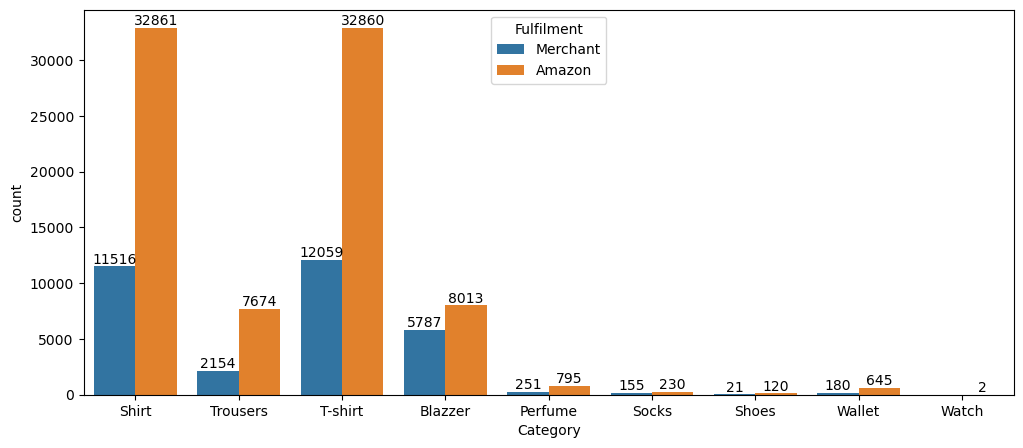

In [17]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = sales_data, x = 'Category', hue='Fulfilment')
for i in ax.containers:
    ax.bar_label(i)

In [18]:
count = sales_data.Fulfilment.value_counts().tolist()

In [19]:
efficiency_data = count[0] / np.sum(count) * 100
print(f"Efficency of Amazon : {efficiency_data}")
print(f"Efficency of Merchant : {100 - efficiency_data}")

Efficency of Amazon : 72.14519219930109
Efficency of Merchant : 27.854807800698907


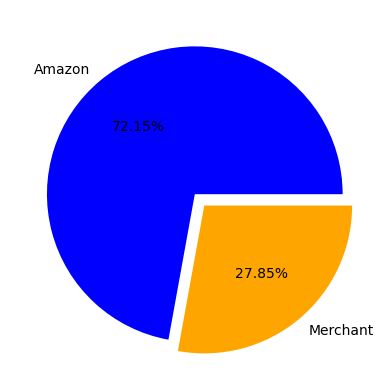

In [20]:
plt.pie(
    x = [efficiency_data, 100 - efficiency_data],
    labels = ['Amazon', 'Merchant'],
    autopct="%1.2f%%",
    explode = [0, 0.1],
    colors = ['blue', 'orange']
)
plt.show()   

#### Fulfillment by Amazon is most efficient

## 3. Sales Overview

In [21]:
sales_data['Date'] = sales_data['Date'].apply(pd.to_datetime)
sales_data.set_index('Date', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5788\1283662264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Date'] = sales_data['Date'].apply(pd.to_datetime)


In [22]:
sales_data.groupby('Category').Amount.sum()

Category
Blazzer     10556730.0
Perfume       757312.0
Shirt       20284059.0
Shoes         113544.0
Socks         137381.0
T-shirt     37525129.0
Trousers     5183367.0
Wallet        428710.0
Watch            610.0
Name: Amount, dtype: float64

In [23]:
sales_data.groupby('Category').get_group(name = 'Shirt')['Amount'].sum()

20284059.0

## 4. Geographical Analysis

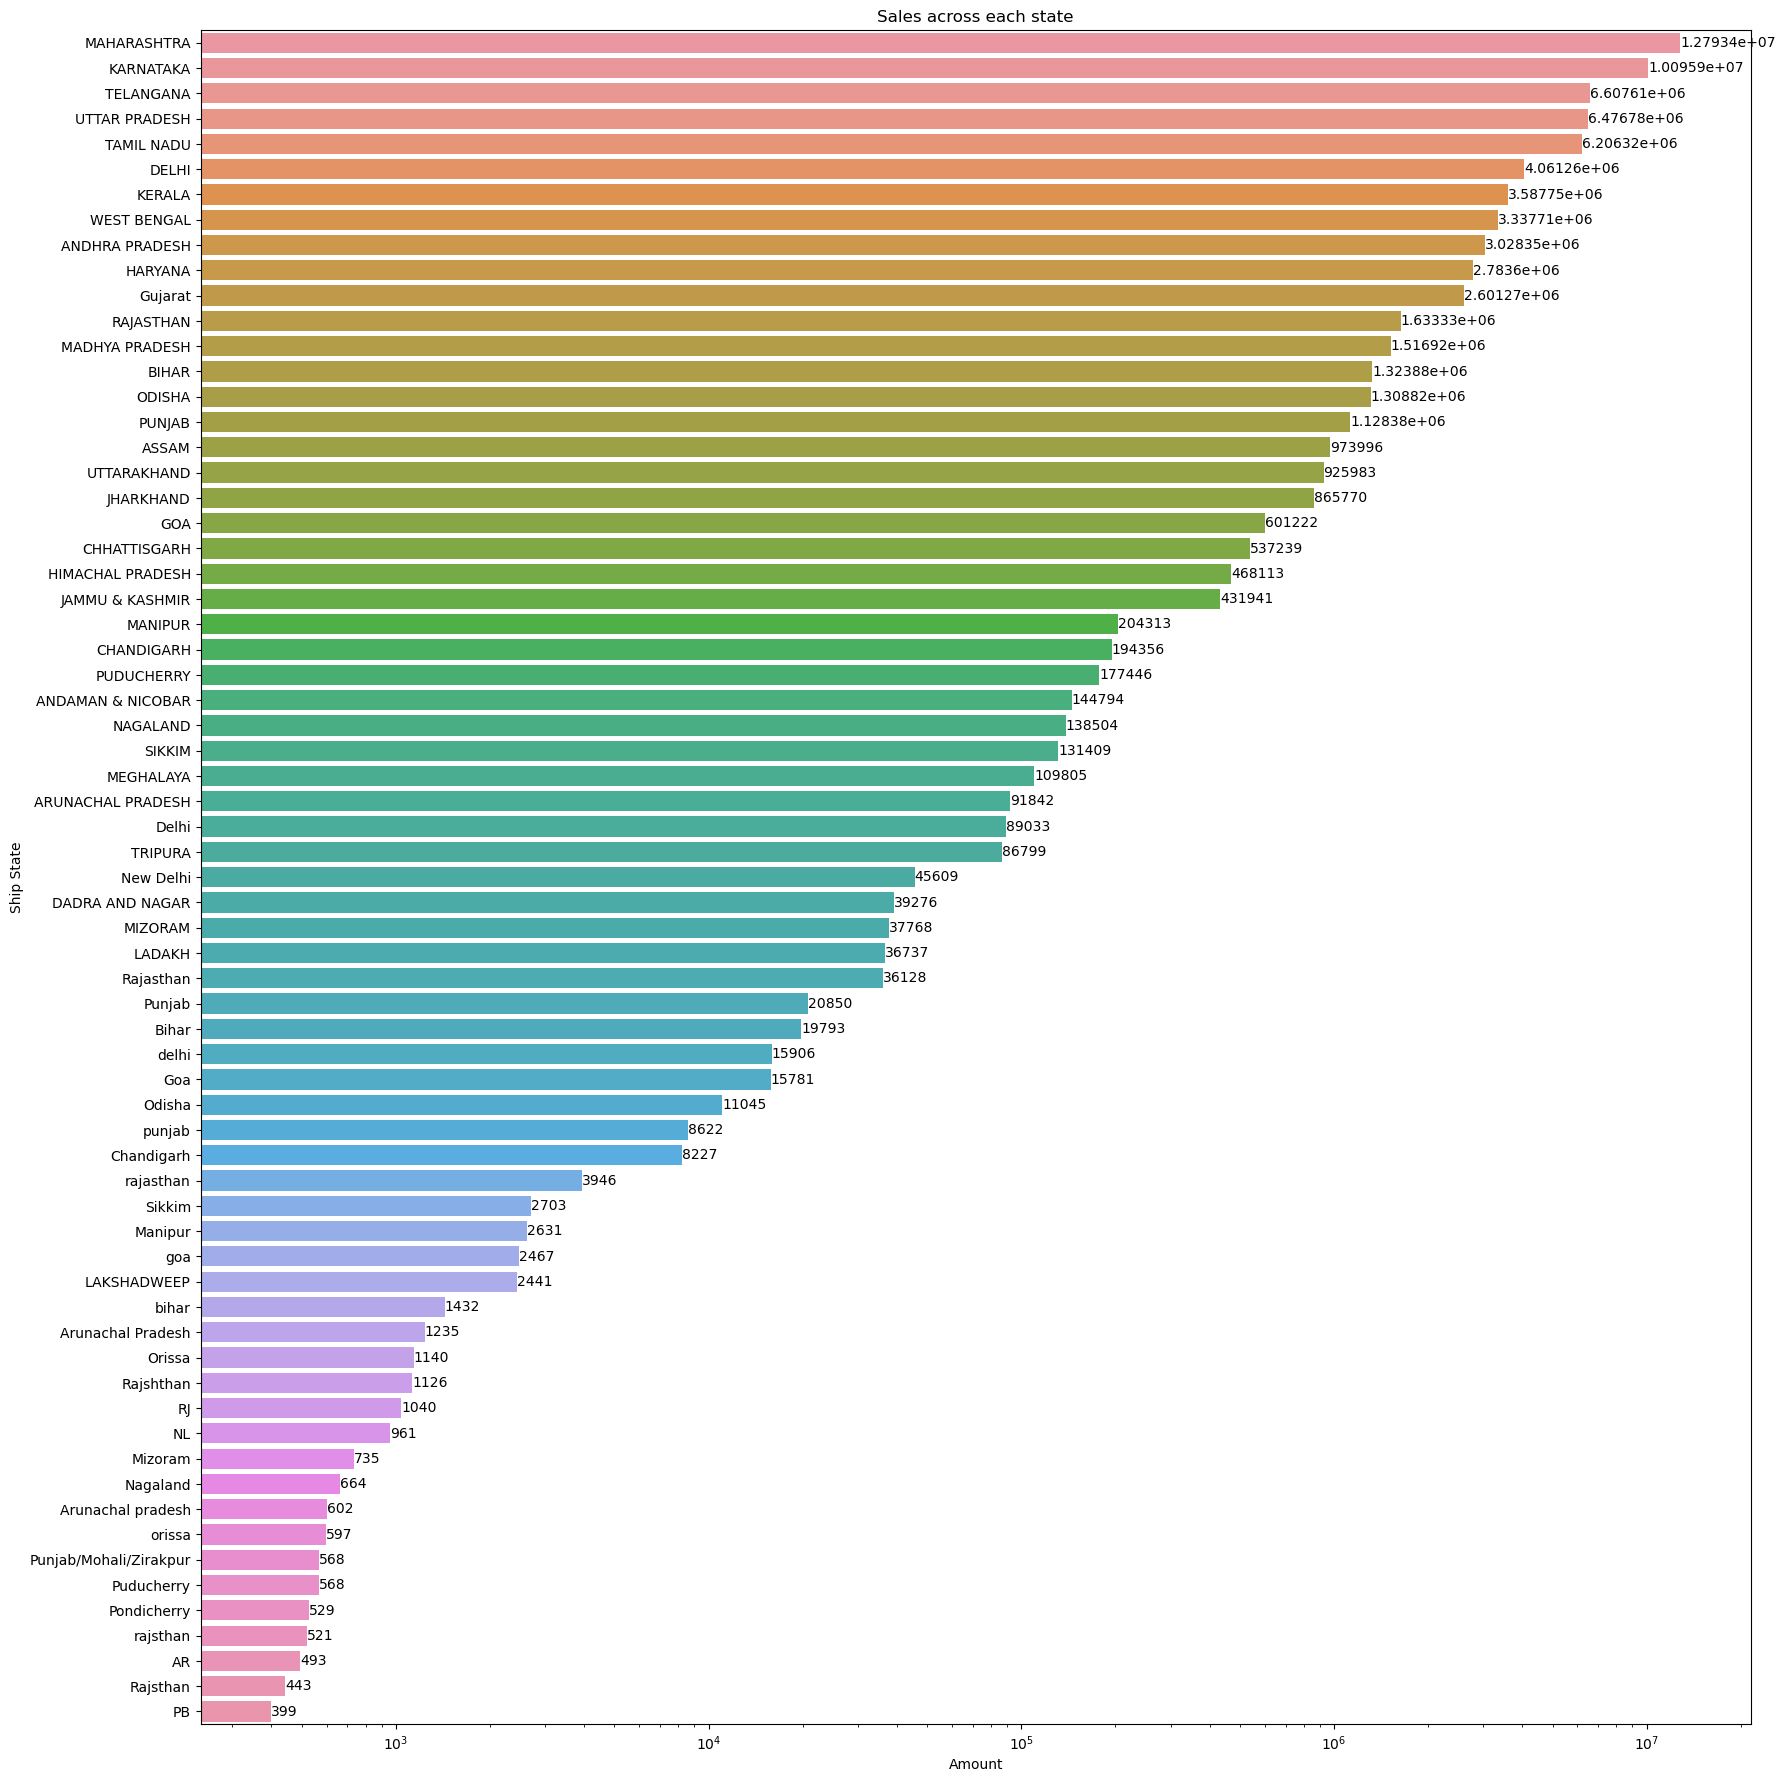

In [31]:
plt.figure(figsize = (20, 22))
df1 = pd.DataFrame(sales_data.groupby('ship-state')['Amount'].sum())
df1 = df1.sort_values(by = 'Amount', ascending = False)
ax = sns.barplot(y = df1.index.tolist(), x = 'Amount', data = df1, log = True)
plt.ylabel('Ship State')
plt.title('Sales across each state')
for i in ax.containers:
    ax.bar_label(i)

## 5. Business Insights

In [36]:
state = sales_data['ship-state'].unique().tolist()[1]
df5 = pd.DataFrame(sales_data[sales_data['ship-state']==state].groupby('Size')['Category'].value_counts())
df5

Category
Size Category          
3XL  Shirt          949
     T-shirt        935
     Blazzer        424
     Trousers       280
     Socks           12
4XL  Shirt           72
     T-shirt         12
5XL  Shirt           85
     T-shirt         17
6XL  Shirt          108
     T-shirt          9
Free Perfume        222
     Wallet         108
     Shoes           17
L    Shirt         1278
     T-shirt       1254
     Blazzer        471
     Trousers       349
     Socks            8
M    T-shirt       1279
     Shirt         1251
     Blazzer        356
     Trousers       351
     Socks            4
S    T-shirt       1035
     Shirt          811
     Blazzer        271
     Trousers       266
     Socks            8
XL   Shirt         1300
     T-shirt       1195
     Blazzer        427
     Trousers       402
     Socks           13
XS   T-shirt        745
     Shirt          463
     Trousers       208
     Blazzer        184
     Socks            6
XXL  Shirt         1235
     T-shirt        927
     Trousers       411
     Blazzer        397
     Socks            6